# Kapittel 2 - Konsumentteori 2.1 - 2.4

Notatblokken lastes enklest ned på [https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Konsumenteori%20-%20Kapittel%202.ipynb](https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Konsumenteori%20-%20Kapittel%202.ipynb)

### Substitusjons- og inntektseffekten av en prisendring
En prisendring har to effekter: (i) substitusjonseffekten som vanligvis gjør at konsumenten bytter bort fra en vare som er blitt relativt dyrere, (ii) inntektseffekten som følger av en endring i reell kjøpekraft pga en prisendring. Figuren viser dekomponeringen for en økning i prisen på gode B, hvor budsjettlinjen dreier fra $m_1$ til $m_2$.

Endring fra tilpasning i punkt a til punkt b viser substitusjonseffekten, som reduserer etterspørsel etter gode B som er blitt relativt dyrere, og øker etterspørsel etter gode A. Endring fra punkt b til punkt c viser inntektseffekten, hvor etterspørsel etter begge goder faller pga av konsumentens realinntekt har falt. I sum (ac) er etterspørsel etter gode B blitt redusert, mens etterspørselen etter gode A er uendret. For gode B går begge effektene i negativ retning (lavere etterspørsel). For gode A er substitusjonseffekten positiv og  inntektseffekten er negativ retning. Ved Cobb-Douglas-preferanser vil krysspriseffekten være null.

![Bilde](Picture2.png)

### Oppskrift for å tegne og beregne inntekts og substitusjonseffekter

Vi ser på en husholdning som har en Cobb-Douglas nyttefunksjon

$U(A,B)=A^{0.5}B^{0.5}$.

Vi antar at  $p_A=p_B=2, I=100$ i utgangspunktet, så økes prisen på gode B til 6.   

  

##### Steg 1
Før prisendringen: beregn optimal verdier på $A, B$ og finn nyttenivået som konsumenten oppnår. Tegn tilpasningen i en figur (budsjettbetingelse, oppnådd nytte og tilpasningspunkt).

##### Steg 2
Prisen på gode B økes. Finn de nye verdiene på $A, B$ og finn det nye nyttenivået. Tegn den nye budsjettlinjen, oppnådd nytte og tilpasningen inn i figuren. Beregn den totale endringen i etterspørsel etter gode 1 og 2. 

##### Steg 3
Gitt den nye prisen på gode B finn hvor mye inntekt konsumenten trenger for å oppnå nyttenivået fra Steg 1. Med denne fiktive budsjettlinjen finn konsumentens tilpasning og tegn denne i figuren.

##### Steg 4
Dekomponer den totale endringen fra Steg 2 i en substitusjonseffekt (langs indifferenskurven fra steg 1) og en inntektseffekt (fra indifferenskurven fra steg 1 til indifferenskurven fra steg 2)


In [31]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

I kode kaller vi her eksponentene for alpha og beta for å gjøre koden mer oversiktlig. $A^{\alpha}$ og $B^{\beta}$ hvor $\alpha = 0.5, \beta = 0.5$

In [32]:
# symboler

A, B, I, p_A, p_B, = sp.symbols("A B I p_A p_B", real=True, positive=True)

alpha = 0.5
beta = 0.5

# nytte
nytte = A**alpha*B**beta

# steg 1

A_eq = (alpha*I)/(p_A*(alpha+beta)) # _eq for "equation"
B_eq = (beta*I)/(p_B*(alpha+beta))



# budsjett A = I/p_A - p_BB/p_B

def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
display(budsjett(I, B, p_B, p_A))

-B*p_B/p_A + I/p_A

In [33]:

# oppnådd nytte i likevekt

Vcd = nytte.subs([(A, A_eq), (B, B_eq)]) #setter inn A ligningen og B ligningen inn i nytte funksjonen
Vcd

# LEGG MERKE TIL AT DETTE ER EN FUNKSJON AV I
# DETTE BRUKES I STEG 3

0.5*I**1.0/(p_A**0.5*p_B**0.5)

In [34]:
# lag funksjon for indifferenskurve
U_a=sp.symbols('U_a', real = True, positive=True) #U_a for "Utility" fra a

ind_kcd = sp.solve(nytte-U_a, A)[0] #Ind for indifferense, K for kurve, cd for cobbdouglas. 
display(ind_kcd)

U_a**2/B

In [35]:
ind_kcd_fn = sp.lambdify((B,U_a), ind_kcd) #Her settes det _fn for "function" for plotting.

ind_kcd_fn



<function _lambdifygenerated(B, U_a)>

In [36]:
# sett inn verdier

B_eq_num = float(B_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
A_eq_num = float(A_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
nytte_num = float(Vcd.subs([(I, 100), (p_A, 2), (p_B, 2)]))
display(A_eq_num)
display(B_eq_num)
display(nytte_num)

25.0

25.0

25.000000000000014

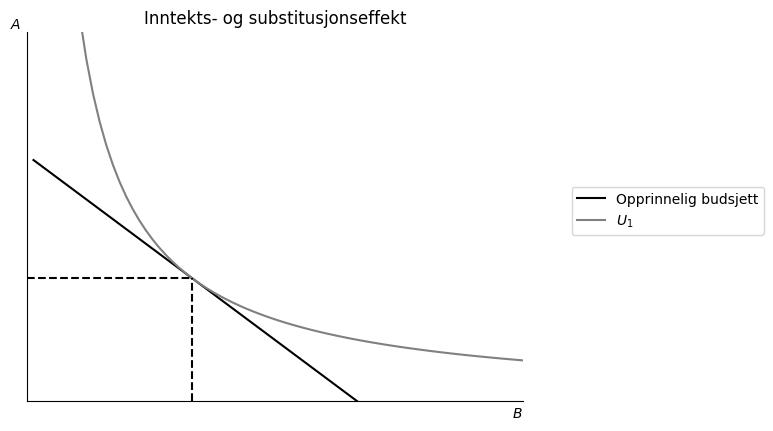

In [37]:
# tegne steg 1

# lage en akse

x=np.linspace(1.01,100, 100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,75))
ax.set(ylim=(0,75))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])

# Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt.
ax.plot(x, budsjett(100, x, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_num), color='grey',label='$U_1$')

ax.vlines(B_eq_num, 0, A_eq_num, ls='dashed', color='black')
ax.hlines(A_eq_num, 0, B_eq_num, ls='dashed', color='black')

# ax.annotate('$B(a)$', (B_eq_num, 0), annotation_clip=False)
# ax.annotate('$A(a)$', (0, A_eq_num), annotation_clip=False)
# ax.annotate('a', (B_eq_num,A_eq_num))
# ax.plot(B_eq_num, A_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [38]:
# Steg 2

# beregne nye verdier


B_eq_ny = float(B_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
A_eq_ny = float(A_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
nytte_ny = float(Vcd.subs([(I, 100), (p_B, 6), (p_A, 2)]))


display(B_eq_ny)
display(A_eq_ny)
display(nytte_ny)

8.333333333333332

25.0

14.433756729740649

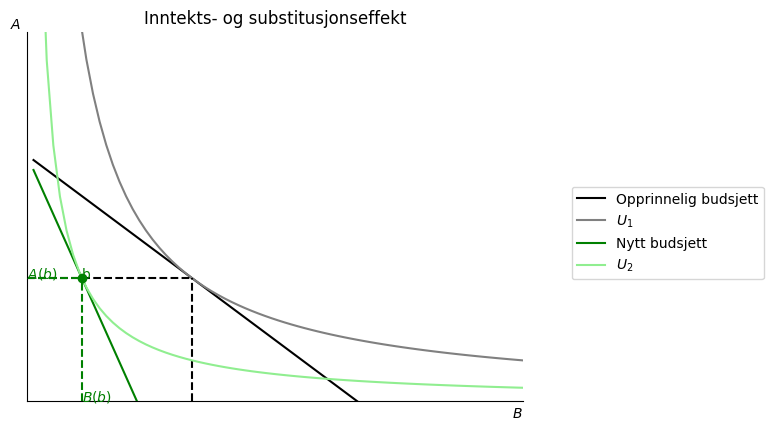

In [39]:
# legg nye verdier på tegningen
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
ax.plot(x, budsjett(100, x, 6, 2), color='green', label='Nytt budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_ny), color='lightgreen', label='$U_2$')

ax.vlines(B_eq_ny, 0, A_eq_ny, ls='dashed', color='green')
ax.hlines(A_eq_ny, 0, B_eq_ny, ls='dashed', color='green')

ax.annotate('$B(b)$', (B_eq_ny, 0), color='green', annotation_clip=False)
ax.annotate('$A(b)$', (0, A_eq_ny), color= 'green', annotation_clip=False)
ax.annotate('b', (B_eq_ny,A_eq_ny), color='green')
ax.plot(B_eq_ny, A_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [40]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_I = Vcd.subs([(p_B, 6), (p_A, 2)])
V_I





0.144337567297406*I**1.0

In [41]:
fikt_cdm = sp.solve(V_I-nytte_num, I) #fikt = fiktiv, cd = cobb douglas, m for "money" eller da inntekt
float(fikt_cdm[0])



173.20508075688826

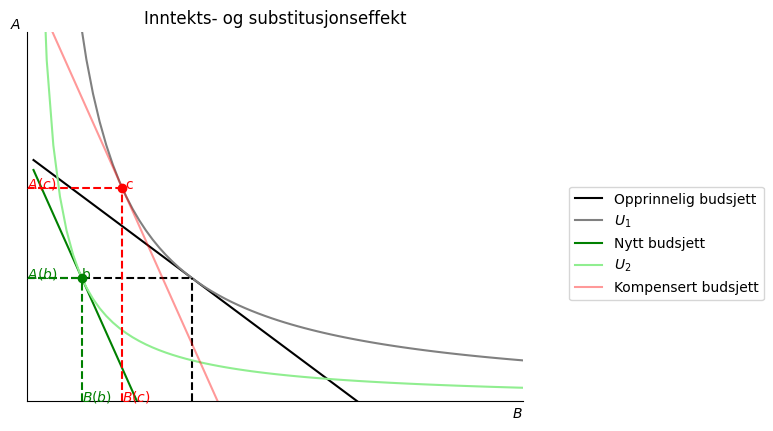

In [42]:
# fiktiv inntekt er 269.24
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
Bcd_eq_komp = float(B_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))
Acd_eq_komp = float(A_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))

# tegne budsjett med denne inntekten "kompensert budsjett"
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
ax.plot(x, budsjett(float(fikt_cdm[0]), x, 6, 2), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(Bcd_eq_komp, 0, Acd_eq_komp, ls='dashed', color='red')
ax.hlines(Acd_eq_komp, 0, Bcd_eq_komp, ls='dashed', color='red')

ax.annotate('$B(c)$', (Bcd_eq_komp, 0), color='red', annotation_clip=False)
ax.annotate('$A(c)$', (0, Acd_eq_komp), color= 'red', annotation_clip=False)
ax.annotate('c', (Bcd_eq_komp+.5,Acd_eq_komp), color='red')
ax.plot(Bcd_eq_komp, Acd_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Tabell kan også for å vise effektene på en ryddig måte. 

In [43]:
# generell tabell
import pandas as pd


Substitusjonseffekt_gode_1 = Bcd_eq_komp-B_eq_num
Inntektseffekt_gode_1 = B_eq_ny-Bcd_eq_komp
Totaleffekt_gode_1 = B_eq_ny-B_eq_num


Substitusjonseffekt_gode_2 = Acd_eq_komp-A_eq_num
Inntektseffekt_gode_2 = A_eq_ny-Acd_eq_komp
Totaleffekt_gode_2 = A_eq_ny-A_eq_num

df = pd.DataFrame({
    "Gode": ["1", "2"],
    "Substitusjonseffekt": [Substitusjonseffekt_gode_1, Substitusjonseffekt_gode_2],
    "Inntektseffekt": [Inntektseffekt_gode_1, Inntektseffekt_gode_2],
    "Total effekt": [Totaleffekt_gode_1, Totaleffekt_gode_2]
})

df.set_index('Gode', inplace=True) #fjerner index kolonnen
display(df)

,Substitusjonseffekt,Inntektseffekt,Total effekt
Gode,,,
1,-10.566243,-6.100423,-16.666667
2,18.301270,-18.301270,0.000000


## 2.1 Effekten av høyere strømpriser, i to steg

Anne og venninnen Beate sitter fortsatt på kafeen og diskuterer den høye strømprisen. De to godene, mat (A) og en varm bolig (B), kostet i utgangspunktet $p_B^{l} = p_A = 1$, og så dobles prisen på strøm slik at $p_B^{h} = 2$.

De har begge en inntekt på $I = 1$.

Anne har en balansert Cobb-Douglas-nyttefunksjon, mens Beate legger større vekt på en god og varm bolig, med en nyttefunksjon:

$$
U_{Beate} = A^{0.25}B^{0.75}
$$

Annes substitusjons- og inntektseffekter av prisøkningen finner vi i matteboks 2.1 i boken, men hva med Beates?

Fokuser på effekten på konsumet av gode B, og regn ut og illustrer. Sammenlign effekten av prisøkningen for de to venninnene.

In [44]:
#Kopier inn koden fra første eksempelet og sett inn nye verdier for "alpha" and "beta" som nå er 0.25 og 0.75
# symboler

A, B, I, p_A, p_B, = sp.symbols("A B I p_A p_B", real=True, positive=True)

alpha = 0.75
beta = 0.25

# nytte
nytte = A**alpha*B**beta

# steg 1

A_eq = (alpha*I)/(p_A*(alpha+beta)) # _eq for "equation"
B_eq = (beta*I)/(p_B*(alpha+beta))



# budsjett A = I/p_A - p_BB/p_B
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)

display(budsjett(I, B, p_B, p_A))

-B*p_B/p_A + I/p_A

For å sammenligne arbeidet som var nødvendig for å løse dette i python, så kan vi løse det for hånd også.

$$
I = 1,
P_A = P^l_B = 1
P^h_B = 2
$$

$$
U_{Beate} = A^{0.25}B^{0.75}
$$




In [45]:
A, B, I, p_A, p_B, = sp.symbols("A B I p_A p_B", real=True, positive=True)

alpha = 0.25
beta = 0.75

# nytte
nytte = A**alpha*B**beta

nytte

A**0.25*B**0.75

In [46]:

# steg 1

A_eq = (alpha*I)/(p_A*(alpha+beta)) # _eq for "equation"
B_eq = (beta*I)/(p_B*(alpha+beta))



# budsjett A = I/p_A - p_BB/p_B
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)

Vcd = nytte.subs([(A, A_eq), (B, B_eq)]) #setter inn A ligningen og B ligningen inn i nytte funksjonen
Vcd

0.569876764238694*I**1.0/(p_A**0.25*p_B**0.75)

In [47]:
# lag funksjon for indifferenskurve
U_a=sp.symbols('U_a', real = True, positive=True) #U_a for "Utility" fra a

ind_kcd = sp.solve(nytte-U_a, A)[0] #Ind for indifferense, K for kurve, cd for cobbdouglas.

ind_kcd_fn = sp.lambdify((B,U_a), ind_kcd) #Her settes det _fn for "function" for plotting.



ind_kcd

U_a**4/B**3


For å kunne dekomponere inntekts og substitusjonseffektene så må vi beregene hvor mye strøm Beate hadde dersom hun fikk akkurat nok penger til å beholde samme nytte som før gitt nye priser. 


$$
\frac{MU_A}{MU_B} = \frac{p_A}{p_B} \rightarrow \frac{0.25 \cdot A^{-0.75} \cdot B^{0.75}}{0.75 \cdot A^{0.25} \cdot B^{-0.25}} \rightarrow \frac{0.25 \cdot B}{0.75 \cdot A} = \frac{1}{2}
$$

I tilfelle det ikke er klart hvordan vi kommer frem til $\frac{0.25\cdot B}{0.75 \cdot A}$ så ligger litt grundigere utregning nederst i dokumentet



$$
\frac{B}{3A} = \frac{1}{2} \rightarrow 2B = 3A \rightarrow A = \frac{2}{3}B
$$



Bytter ut A med $\frac{2}{3}B$ i nyttefunksjonen og setter den lik start-nytten
$$
\left(\frac{2}{3}B\right)^{0.25} \cdot B^{0.75} = 0.569877
$$

Vi kan bruke eksponentreglene for å forenkle dette uttrykket

$$
\left(\frac{2}{3}\right)^{0.25} \cdot B^{0.25} \cdot B^{0.75} = 0.569877
$$

Setter sammen


$$
0.9036 \cdot B^{1} = 0.569877
$$





In [48]:

# sett inn verdier

B_eq_num = float(B_eq.subs([(I, 1), (p_A, 1), (p_B, 1)]))
A_eq_num = float(A_eq.subs([(I, 1), (p_A, 1), (p_B, 1)]))
nytte_num = float(Vcd.subs([(I, 1), (p_A, 1), (p_B, 1)]))
display(A_eq_num)
display(B_eq_num)
display(nytte_num)

0.25

0.75

0.5698767642386945

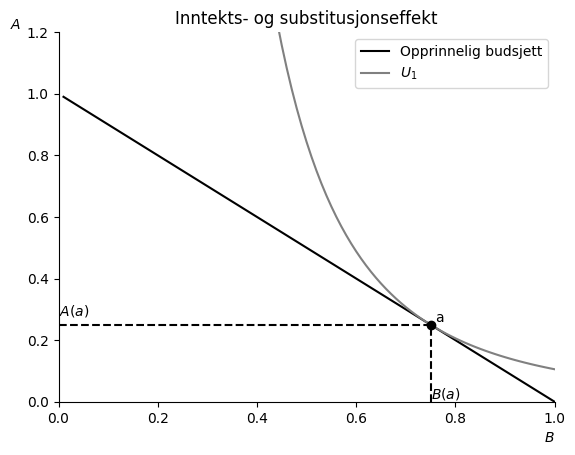

In [49]:
# tegne steg 1

# lage en akse

x=np.linspace(0.01,1, 100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,1))
ax.set(ylim=(0,1.2))

#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
ax.plot(x, budsjett(1, x, 1, 1), color='black', label='Opprinnelig budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_num), color='grey',label='$U_1$')

ax.vlines(B_eq_num, 0, A_eq_num, ls='dashed', color='black')
ax.hlines(A_eq_num, 0, B_eq_num, ls='dashed', color='black')

ax.annotate('$B(a)$', (B_eq_num, 0.01), annotation_clip=False)
ax.annotate('$A(a)$', (0, A_eq_num+0.03), annotation_clip=False)
ax.annotate('a', (B_eq_num+0.01,A_eq_num+0.01))
ax.plot(B_eq_num, A_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend();

In [50]:
# Steg 2

# beregne nye verdier


B_eq_ny = float(B_eq.subs([(I, 1), (p_B, 2), (p_A, 1)]))
A_eq_ny = float(A_eq.subs([(I, 1), (p_B, 2), (p_A, 1)]))
nytte_ny = float(Vcd.subs([(I, 1), (p_B, 2), (p_A, 1)]))


display(B_eq_ny)
display(A_eq_ny)
display(nytte_ny)

0.375

0.25

0.33885075135369186

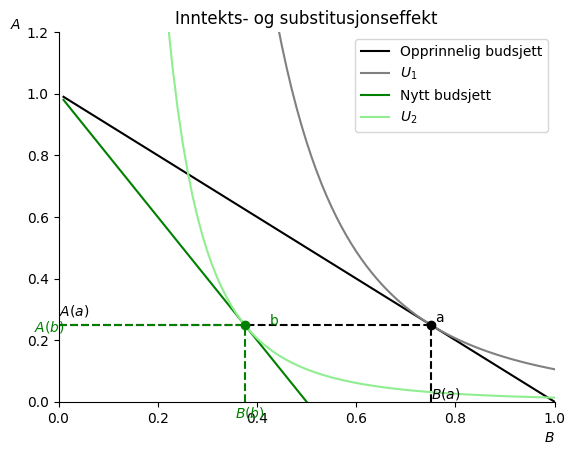

In [51]:


# legg nye verdier på tegningen
#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. 
ax.plot(x, budsjett(1, x, 2, 1), color='green', label='Nytt budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_ny), color='lightgreen', label='$U_2$')

ax.vlines(B_eq_ny, 0, A_eq_ny, ls='dashed', color='green')
ax.hlines(A_eq_ny, 0, B_eq_ny, ls='dashed', color='green')

ax.annotate('$B(b)$', (B_eq_ny-0.02, -0.05), color='green', annotation_clip=False)
ax.annotate('$A(b)$', (-0.05, A_eq_ny-0.02), color= 'green', annotation_clip=False)
ax.annotate('b', (B_eq_ny+0.05,A_eq_ny), color='green')
ax.plot(B_eq_ny, A_eq_ny , marker='o', color='green')

ax.legend()
fig

In [52]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_I = Vcd.subs([(p_B, 2), (p_A, 1)])
V_I



0.338850751353692*I**1.0

In [53]:
fikt_cdm = sp.solve(V_I-nytte_num, I) #fikt = fiktiv, cd = cobb douglas, m for "money" eller da inntekt
float(fikt_cdm[0])


1.681792830507427

In [54]:
# fiktiv inntekt er 1.68
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
Bcd_eq_komp = float(B_eq.subs([(I, float(fikt_cdm[0])), (p_B, 2), (p_A, 1)]))
Acd_eq_komp = float(A_eq.subs([(I, float(fikt_cdm[0])), (p_B, 2), (p_A, 1)]))
Bcd_eq_komp

0.6306723114402851


Løser for kompensert B

$$
B_{komp} = \frac{0.569877}{0.9036} \approx 0.63
$$

Beate ville brukt 0.63 på strøm dersom hun fikk akkurat nok penger til å beholde samme nytte som før gitt nye priser. Dette er det "hypotetiske" forbruket av strøm hvis hun ble kompensert for å beholde nytten. 


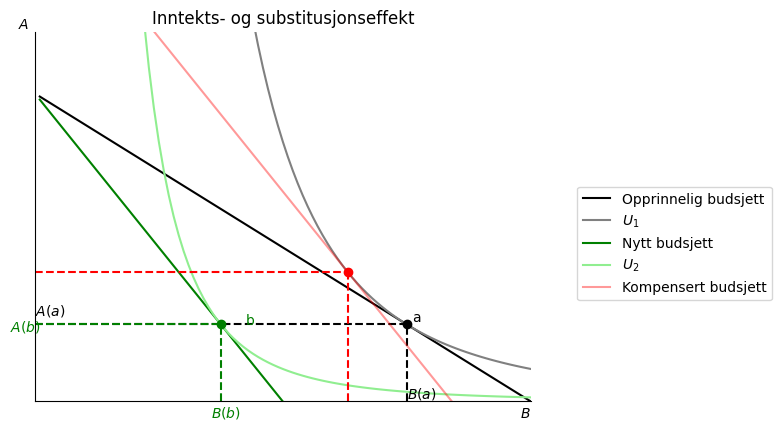

In [55]:

# tegne budsjett med denne inntekten "kompensert budsjett"

#Obs budjsett er definert som inntekt, x, pris på B, pris på A, ikke omvendt. Derfor er det 2,1 og ikke 1,2 her.
ax.plot(x, budsjett(float(fikt_cdm[0]), x, 2, 1), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(Bcd_eq_komp, 0, Acd_eq_komp, ls='dashed', color='red')
ax.hlines(Acd_eq_komp, 0, Bcd_eq_komp, ls='dashed', color='red')


ax.plot(Bcd_eq_komp, Acd_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))




ax.set_xticks([], [])
ax.set_yticks([], [])

fig


$$
SE = 0.63 - 0.75 = -0.12
$$
$$
IE = 0.375 - 0.63 = -0.256
$$
Total effekt
$$
TE = SE + IE = -0.12 + (-0.256) \approx -0.375
$$



In [56]:
# generell tabell
import pandas as pd


Substitusjonseffekt_gode_1 = Bcd_eq_komp-B_eq_num
Inntektseffekt_gode_1 = B_eq_ny-Bcd_eq_komp
Totaleffekt_gode_1 = B_eq_ny-B_eq_num


Substitusjonseffekt_gode_2 = Acd_eq_komp-A_eq_num
Inntektseffekt_gode_2 = A_eq_ny-Acd_eq_komp
Totaleffekt_gode_2 = A_eq_ny-A_eq_num

df = pd.DataFrame({
    "Gode": ["1", "2"],
    "Substitusjonseffekt": [Substitusjonseffekt_gode_1, Substitusjonseffekt_gode_2],
    "Inntektseffekt": [Inntektseffekt_gode_1, Inntektseffekt_gode_2],
    "Total effekt": [Totaleffekt_gode_1, Totaleffekt_gode_2]
})

df.set_index('Gode', inplace=True) #fjerner index kolonnen
display(df)

,Substitusjonseffekt,Inntektseffekt,Total effekt
Gode,,,
1,-0.119328,-0.255672,-0.375
2,0.170448,-0.170448,0.000


Kode dere kan bruke for illustrasjon
```python
x=np.linspace(0.01,1, 100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,1.5))
ax.set(ylim=(0,1.5))

```

## 2.2 Hvordan påvirker en renteøkning etterspørselen etter bolig og andre ting?

Du er nyutdannet siviløkonom og har fått jobb i analyseavdelingen i Norges Bank. En av dine oppgaver er å følge med på hvordan etterspørselen utvikler seg i ulike markeder. Styringsrenten er nettopp satt opp, og bankenes rente på boliglån forventes å følge etter.

Sjefen er interessert i hvordan en endring i renten påvirker ettersøprselen etter bolig og andre ting, og ber deg bruke mikroøkonomisk teori for å belyse dette spørsmålet.

Du tar utgangspunkt i at økning i renten gjør at prisen på boligkonsum, $p_B$, går opp. Og så tenker du at det kan være nyttig å bruke et talleksempel for å illustrere effektene. Du antar at husholdningen har en inntekt $I = 1$, som kan brukes på bolig (B) og andre ting (A); at prisene i utgangspunktet er $p_B^{l} = p_A = 1$; og at renteøkningen så fører til at prisen på B dobles til $p_B^{h} = 2$.

Bolig er et spesielt gode, man trenger tak over hodet. Du velger derfor å studere to ulike nyttefunksjoner: En balansert Cobb-Douglas-funksjon:

$$
U = A^{0.5}B^{0.5},
$$

hvor $A$ er andre ting og $B$ er bolig.

Og en nyttefunksjon hvor bolig er et basisgode:

$$
U = A^{0.5}(B-b)^{0.5},
$$

hvor $b$ er minstekonsumet av gode $B$, og hvor du lar være $b = 0.2$.

Du regner ut konsumet av $A$ og $B$ før og etter rentehevingen og illustrerer dine funn ved hjelp av figurer. Bruk en figur for hver nyttefunksjon, og kommenter forskjellene du ser.

In [57]:
A, B = sp.symbols('A B', positive=True)

I = 1
p_A = 1
p_B_lav = 1
p_B_hoy = 2
alpha = 0.5

def cobb_douglas(alpha, I, p_A, p_B):
    A_opt = alpha * I / p_A
    B_opt = (1 - alpha) * I / p_B
    return A_opt, B_opt


In [58]:
A0, B0 = cobb_douglas(alpha, I, p_A, p_B_lav)
A1, B1 = cobb_douglas(alpha, I, p_A, p_B_hoy)

display(A0, B0)
display(A1, B1)

0.5

0.5

0.5

0.25

In [59]:
def indiff(A_vals, alpha, U0):
    return (U0 / (A_vals**alpha))**(1/(1-alpha))


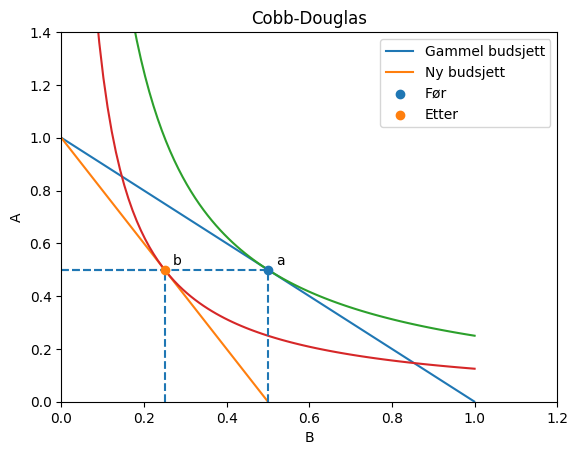

In [60]:
a_verdier = np.linspace(0.001, 1, 100)

U0 = (A0**alpha) * (B0**(1-alpha))
U1 = (A1**alpha) * (B1**(1-alpha))

fig, ax = plt.subplots()

# Budsjettlinjer
ax.plot((1-a_verdier), a_verdier, label="Gammel budsjett")
ax.plot((1-a_verdier)/2, a_verdier, label="Ny budsjett")

# Indifferens
ax.plot(a_verdier, indiff(a_verdier, alpha, U0))
ax.plot(a_verdier, indiff(a_verdier, alpha, U1))
# Punkter
ax.scatter(B0, A0, label="Før",zorder=6)
ax.scatter(B1, A1, label="Etter",zorder=6)

# Tegner linjer
ax.vlines(B0, 0, A0, ls='--')
ax.hlines(A0, 0, B0, ls='--')
ax.vlines(B1, 0, A1, ls='--')
ax.hlines(A1, 0, B1, ls='--')

# Skriver a og b
ax.annotate('a', (B0+0.02, A0+0.02))
ax.annotate('b', (B1+0.02, A1+0.02))

# Tittel og akselimitasjon
ax.set(xlim=(0,1.2))
ax.set(ylim=(0,1.4))
ax.set_xlabel('B')
ax.set_ylabel('A')
ax.set_title("Cobb-Douglas")
ax.legend();



## Grundigere utregning for første oppgave







$$
\frac{MU_A}{MU_B} = \frac{p_A}{p_B} \rightarrow \frac{0.25 \cdot A^{-0.75} \cdot B^{0.75}}{0.75 \cdot A^{0.25} \cdot B^{-0.25}} = \frac{1}{2}
$$

Vi har 3 ledd hvor vi har tall, "A" leddet og "B" leddet. 
$$
\frac{0.25}{0.75} \cdot A^{-0.75-0.25} \cdot B^{0.75+0.25} = \frac{1}{2}
$$

$$
\frac{0.25}{0.75} = \frac{1}{3}
$$

A leddene eksponentregel og flytter ned
$$
\frac{A^{-0.75}}{A^{0.25}} = A^{-0.75-0.25} = A^{-1} = \frac{1}{A}
$$

B leddene eksponentregel og flytter opp
$$
\frac{B^{0.75}}{B^{-0.25}} = B^{0.75+0.25} = B^1 = B
$$

Samler opp
$$
\frac{MU_A}{MU_B} = \frac{1}{3} \cdot \frac{1}{A} \cdot B = \frac{B}{3A}
$$
Og settes likt
$$
\frac{B}{3A} = \frac{1}{2}
$$

Kan nå kryssmultiplisere og løse for A og B
$$
2B = 3A \rightarrow A = \frac{2}{3}B
$$


Dette gir oss
$$
U_{start} = 0.25^{0.25} \cdot 0.75^{0.75} \approx 0.57
$$
